C:\Users\mcsim\AppData\Local\Temp\ipykernel_8712\1454919263.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stat_df = pd.concat([stat_df, pd.DataFrame(stat_collection.reshape(1,-1), columns=list(stat_df))], ignore_index=True)
C:\Users\mcsim\AppData\Local\Temp\ipykernel_8712\1454919263.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_df = pd.concat([train_df, temp_df], ignore_index=True)
C:\Users\mcsim\AppData\Local\Temp\ipykernel_8712\1454919263.py:58: FutureWarning: The behavior 

min1       9.624011
min2       0.000000
min3       2.954516
min4       0.000000
min5       6.121205
min6       0.046101
max1       4.207745
max2       5.059656
max3       4.819848
max4       2.181809
max5       5.773355
max6       2.533515
mean1      5.276431
mean2      1.577908
mean3      3.976754
mean4      1.168268
mean5      5.704025
mean6      1.157222
median1    5.386624
median2    1.413545
median3    4.009687
median4    1.148591
median5    5.844368
median6    1.089858
std1       1.771282
std2       0.885875
std3       0.952011
std4       0.458612
std5       1.012358
std6       0.516968
1stqt1     6.127846
1stqt2     0.948434
1stqt3     4.184148
1stqt4     0.844919
1stqt5     6.122142
1stqt6     0.761542
3rdqt1     5.031028
3rdqt2     2.131337
3rdqt3     4.153451
3rdqt4     1.555235
3rdqt5     5.563553
3rdqt6     1.526871
dtype: float64
min1
ConfidenceInterval(low=8.585851535688978, high=11.22957421775705)
min2
ConfidenceInterval(low=nan, high=nan)
min3
ConfidenceInterval(low=2.7

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


ConfidenceInterval(low=1.0719987526653532, high=1.216445958388424)
median1
ConfidenceInterval(low=4.839771753853154, high=6.0919248451117785)
median2
ConfidenceInterval(low=1.2502083374202093, high=1.54525807473387)
median3
ConfidenceInterval(low=3.478629525057325, high=4.588765710505719)
median4
ConfidenceInterval(low=1.0608334369745893, high=1.2005549728118878)
median5
ConfidenceInterval(low=4.766914508487221, high=7.181662698037871)
median6
ConfidenceInterval(low=1.004427850151075, high=1.15096925089038)
std1
ConfidenceInterval(low=1.6018120275635428, high=1.9873270854594316)
std2
ConfidenceInterval(low=0.8084626970663037, high=0.943319338488284)
std3
ConfidenceInterval(low=0.8092767501028426, high=1.202685522362135)
std4
ConfidenceInterval(low=0.4257144390611107, high=0.48778369013817396)
std5
ConfidenceInterval(low=0.8445804467905275, high=1.2727938900716953)
std6
ConfidenceInterval(low=0.48188620597571813, high=0.5444548326352945)
1stqt1
ConfidenceInterval(low=5.635662055544385, 

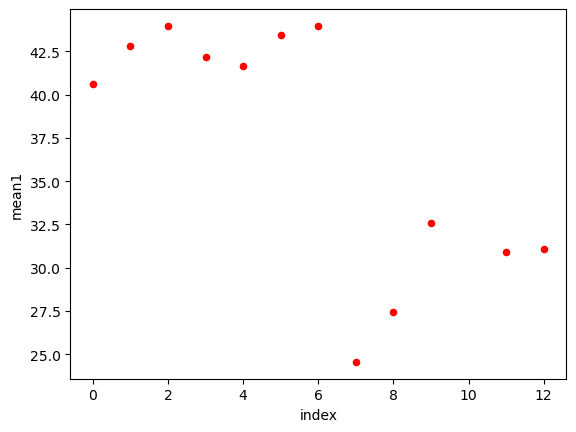

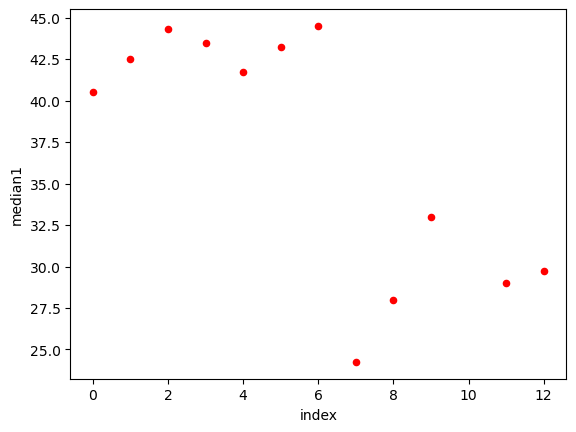

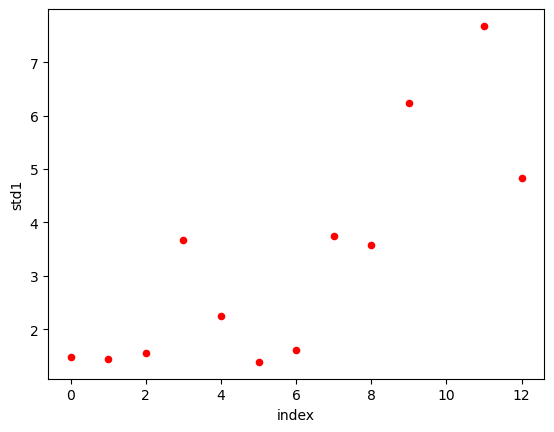

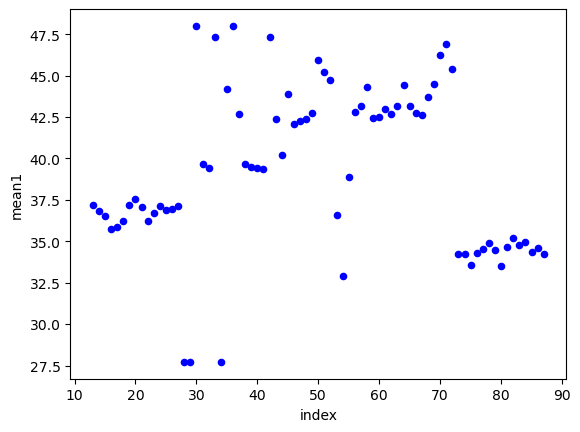

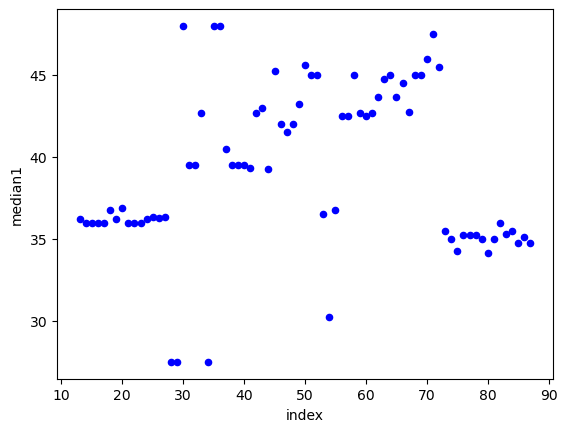

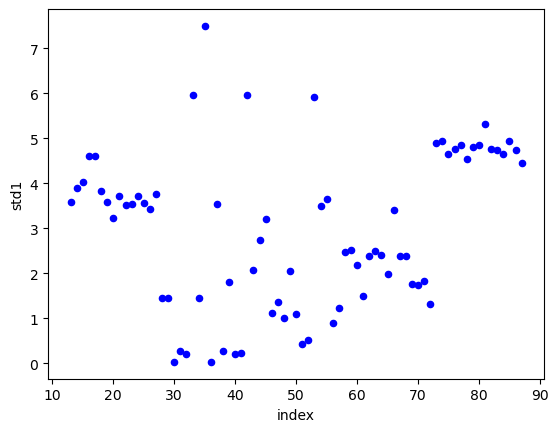

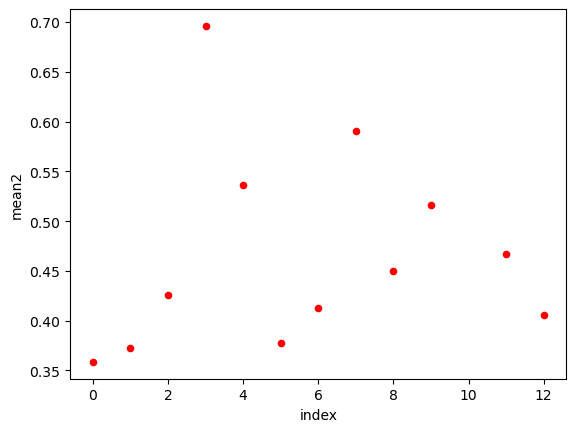

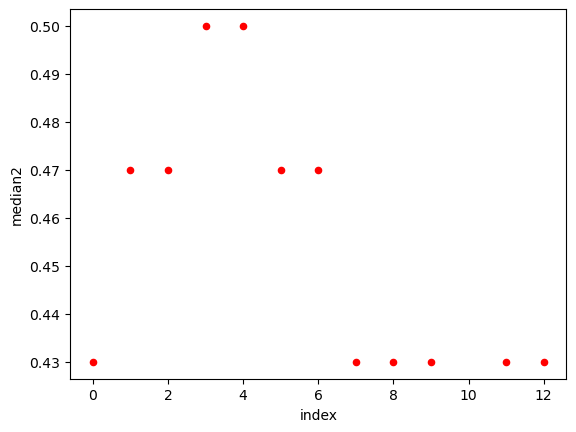

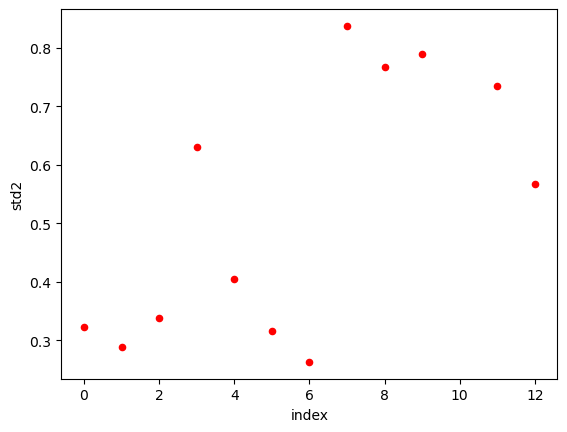

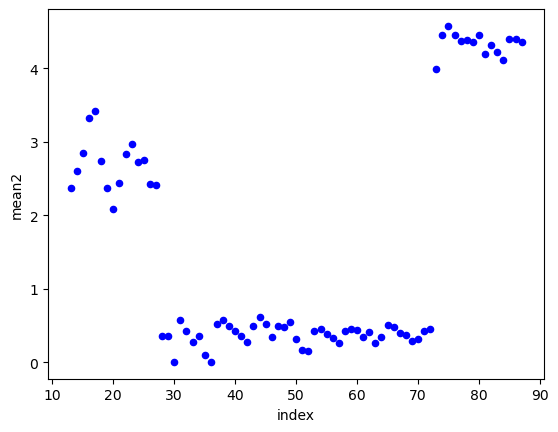

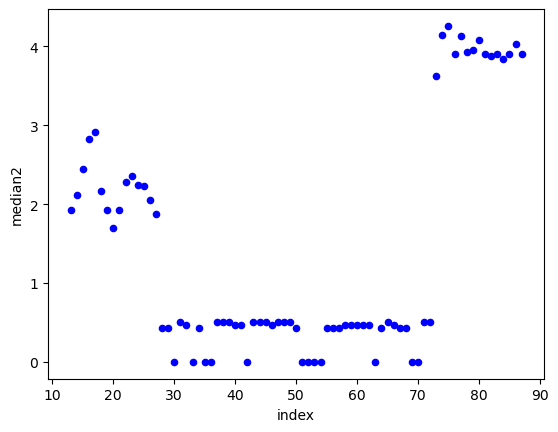

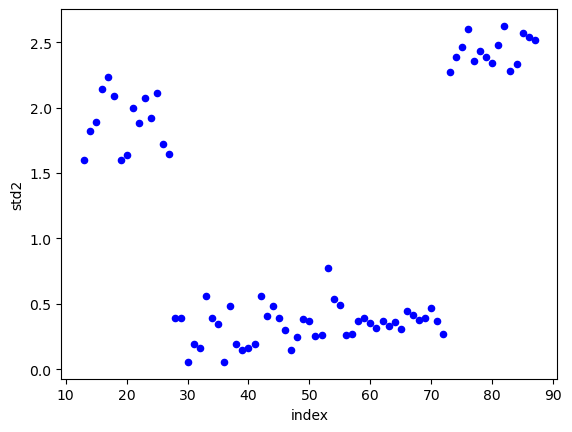

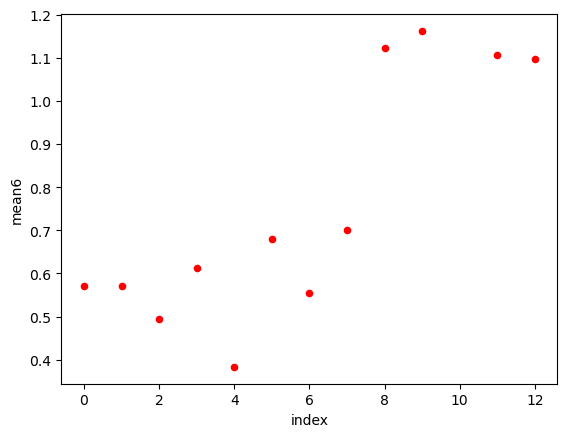

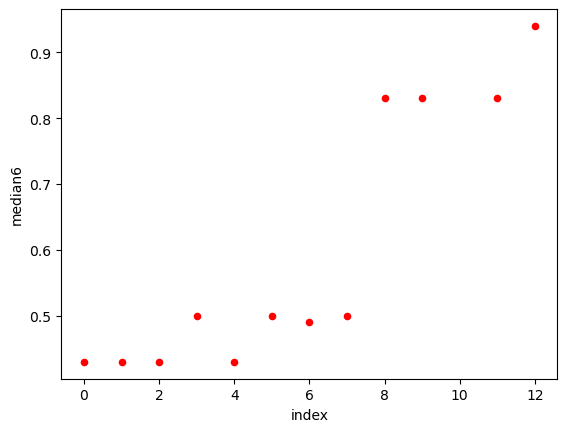

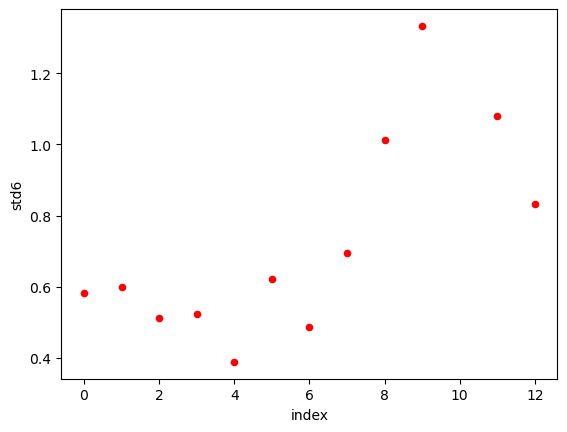

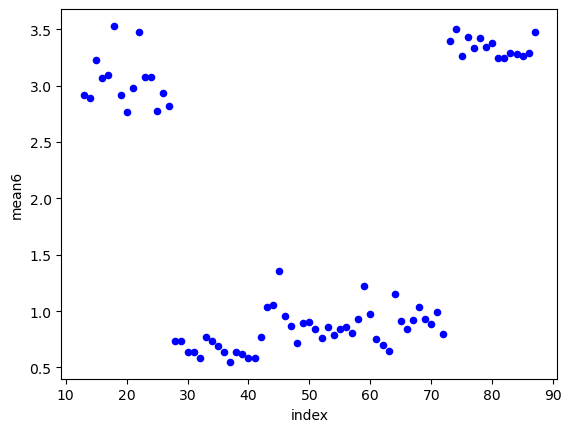

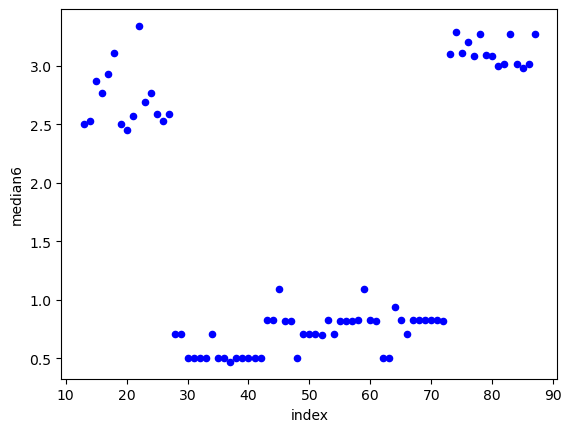

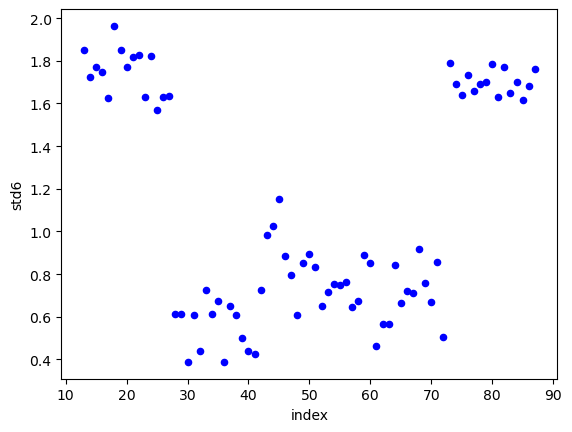

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob 
from scipy.stats import norm
from scipy.stats import bootstrap
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 


train_df = pd.DataFrame(columns=['time','1','2','3','4','5','6'])
test_df = pd.DataFrame(columns=['time','1','2','3','4','5','6'])
stat_df = pd.DataFrame(columns=['min1', 'min2', 'min3', 'min4', 'min5', 'min6',
                                'max1', 'max2', 'max3', 'max4', 'max5', 'max6',
                                'mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6',
                                'median1', 'median2', 'median3', 'median4', 'median5', 'median6',
                                'std1', 'std2', 'std3', 'std4', 'std5', 'std6',
                                '1stqt1', '1stqt2', '1stqt3', '1stqt4', '1stqt5', '1stqt6',
                                '3rdqt1', '3rdqt2', '3rdqt3', '3rdqt4', '3rdqt5', '3rdqt6',])

#                              ['min1', 'max1', 'mean1', 'median1', 'std1', '1stqt1', '3rdqt1',
#                                'min2', 'max2', 'mean2', 'median2', 'std2', '1stqt2', '3rdqt2',
#                                'min3', 'max3', 'mean3', 'median3', 'std3', '1stqt3', '3rdqt3',
#                                'min4', 'max4', 'mean4', 'median4', 'std4', '1stqt4', '3rdqt4',
#                                'min5', 'max5', 'mean5', 'median5', 'std5', '1stqt5', '3rdqt5',
#                                'min6', 'max6', 'mean6', 'median6', 'std6', '1stqt6', '3rdqt6']

files = glob.glob('AReM/**/*.csv',  
                   recursive = True) 
for file in files: 
      #print(file)
      
      temp_df = pd.read_csv(file, comment='#', names=['time','1','2','3','4','5','6'])
      temp_df2 = temp_df[['1', '2', '3', '4', '5', '6']]
      
      stat_collection = np.concatenate([temp_df2.min(axis = 0, numeric_only=True).values,
            temp_df2.max(axis = 0, numeric_only=True).values,
            temp_df2.mean(axis = 0, numeric_only=True).values,
            temp_df2.median(axis = 0, numeric_only=True).values,
            temp_df2.std(axis=0, numeric_only=True).values,
            np.squeeze(temp_df2.quantile([0.25], axis=0, numeric_only=True).values),
            np.squeeze(temp_df2.quantile([0.75], axis=0, numeric_only=True).values)
            ])

      stat_df = pd.concat([stat_df, pd.DataFrame(stat_collection.reshape(1,-1), columns=list(stat_df))], ignore_index=True)

      if 'dataset1' in file:
            train_df = pd.concat([train_df, temp_df], ignore_index=True)
      elif 'dataset2' in file:
            train_df = pd.concat([train_df, temp_df], ignore_index=True)
      elif 'dataset3' in file:
            if 'bendind1' in file:
                  train_df = pd.concat([train_df, temp_df], ignore_index=True)
            elif 'bendind2' in file:
                  train_df = pd.concat([train_df, temp_df], ignore_index=True)
            else:
                  test_df = pd.concat([test_df, temp_df], ignore_index=True)
      else:
            test_df = pd.concat([test_df, temp_df], ignore_index=True)

#data = pd.read_csv("AReM/bending1/dataset1.csv", comment='#')
#print(test_df)

#test_df = test_df[['1', '2', '3', '4', '5', '6']]
#print(test_df.columns)

#print("The Minimumum is ")
#print(test_df.min(axis = 0, numeric_only=True))
#print("The Maximum is ")
#print(test_df.max(axis = 0, numeric_only=True))
#print("The Mean is ")
#print(test_df.mean(axis = 0, numeric_only=True))
#print("The Median is ")
#print(test_df.median(axis = 0, numeric_only=True))
#print("The Standard Deviation is ")
#print(test_df.std(axis=0, numeric_only=True))
#print("The 1st and 3rd Quantile is ")
#print(test_df.quantile([0.25,0.75], axis=0, numeric_only=True))

print(stat_df.std(axis=0, numeric_only=True))

for series_name, series in stat_df.items():
      rng = np.random.default_rng()
      
      data = series.dropna().values
      print(series_name)
      data = (data,)
      std_sample = np.std(data)
      res = bootstrap(data, np.std, confidence_level=0.9,
                  random_state=rng)
      print(res.confidence_interval)

print("The three most important time-domain features are mean, median, std")


stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'mean1', c = 'red')
stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'median1', c = 'red')
stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'std1', c = 'red')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'mean1', c = 'blue')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'median1', c = 'blue')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'std1', c = 'blue')
plt.show()


stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'mean2', c = 'red')
stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'median2', c = 'red')
stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'std2', c = 'red')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'mean2', c = 'blue')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'median2', c = 'blue')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'std2', c = 'blue')
plt.show()


stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'mean6', c = 'red')
stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'median6', c = 'red')
stat_df.iloc[:13].reset_index().plot(kind='scatter', x='index', y = 'std6', c = 'red')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'mean6', c = 'blue')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'median6', c = 'blue')
stat_df.iloc[13:].reset_index().plot(kind='scatter', x='index', y = 'std6', c = 'blue')
plt.show()


break time series into two


Break time series into 20
logistic regression using time domain features